# Predict breast cancer


Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. Ten biological attributes of the cancer cell nuclei have been calculated from the images, as described below:
Attribute 	Domain
1. Sample code number 	id number
2. Clump Thickness 	1 - 10
3. Uniformity of Cell Size 	1 - 10
4. Uniformity of Cell Shape 	1 - 10
5. Marginal Adhesion 	1 - 10
6. Single Epithelial Cell Size 	1 - 10
7. Bare Nuclei 	1 - 10
8. Bland Chromatin 	1 - 10
9. Normal Nucleoli 	1 - 10
10. Mitoses 	1 - 10
11. Class 	(2 for benign, 4 for malignant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
cancer_prediction = pd.read_csv("cancer.data")

In [3]:
cancer_prediction.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
cancer_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
1000025    698 non-null int64
5          698 non-null int64
1          698 non-null int64
1.1        698 non-null int64
1.2        698 non-null int64
2          698 non-null int64
1.3        698 non-null object
3          698 non-null int64
1.4        698 non-null int64
1.5        698 non-null int64
2.1        698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
cancer_prediction.describe()

,1000025,5,1,1.1,1.2,2,3,1.4,1.5,2.1
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
cancer_prediction.rename (inplace=True, columns={
    '1000025':'Sample code number',
    '5':'Clump Thickness',
    '1':'Uniformity of Cell Size',
    '1.1':'Uniformity of Cell Shape',
    '1.2':'Marginal Adhesion',
    '2':'Single Epithelial Cell Size',
    '1.3':'Bare Nuclei',
    '3':'Bland Chromatin',
    '1.4':'Normal Nucleoli',
    '1.5':'Mitoses',
    '2.1':'Class'
})   

In [7]:
cancer_prediction.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [8]:
correlation = cancer_prediction.corr()[abs(cancer_prediction.corr()["Class"]) > 0.45].sort_values(by=["Class"], ascending=False)

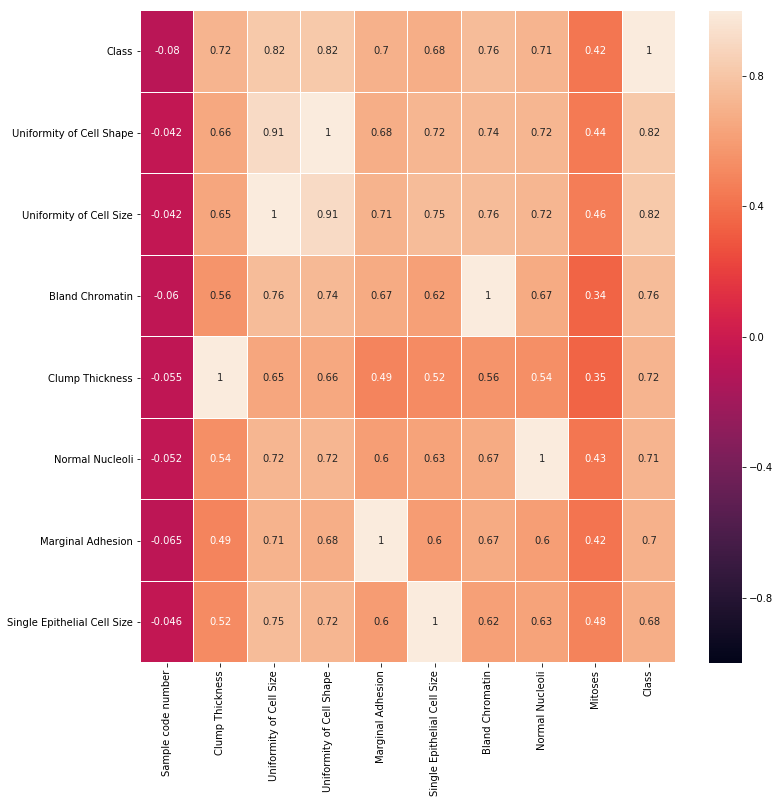

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, linewidth=0.1)

In [10]:

X_train, X_test, y_train, y_test = train_test_split(train.drop('Class',axis=1), 
                                                    train['Class'], test_size=0.30,random_state=101)

NameError: name 'train' is not defined